In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [3]:
train_df = pd.read_csv('Train.csv')
test_df = pd.read_csv('Test.csv')
full_df = pd.concat([train_df, test_df], ignore_index=True)

In [4]:
print(full_df.describe())
print(full_df.info())
print(full_df.isnull().sum())

       geo_longitude  geo_latitude  altitude_pressure    climb_rate  \
count   14967.000000  14967.000000       14967.000000  14967.000000   
mean        7.560847     36.199955        5697.896572     -0.047485   
std        65.993521     19.285082        4106.827722      6.434892   
min      -250.955400    -38.483700      -12629.244600    -25.565300   
25%       -36.522100     22.943850        2892.015700     -4.423500   
50%         7.532500     36.308500        5705.739600     -0.028800   
75%        51.739800     49.365850        8506.535350      4.268200   
max       266.127000    123.049500       20986.201000     24.225000   

       gps_altitude     air_speed  flight_track  
count  14967.000000  14967.000000  14667.000000  
mean    5991.626613    252.672873    183.581953  
std     4307.083047    145.785419    104.620031  
min   -13147.878800      0.051800   -247.598200  
25%     3132.847200    126.457850    113.459250  
50%     5976.175900    252.600200    183.971500  
75%     88

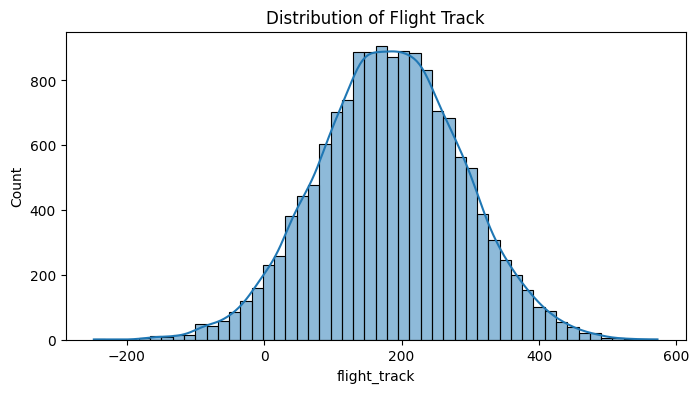

In [6]:
plt.figure(figsize=(8,4))
sns.histplot(train_df['flight_track'], bins=50, kde=True)
plt.title("Distribution of Flight Track")
plt.show()

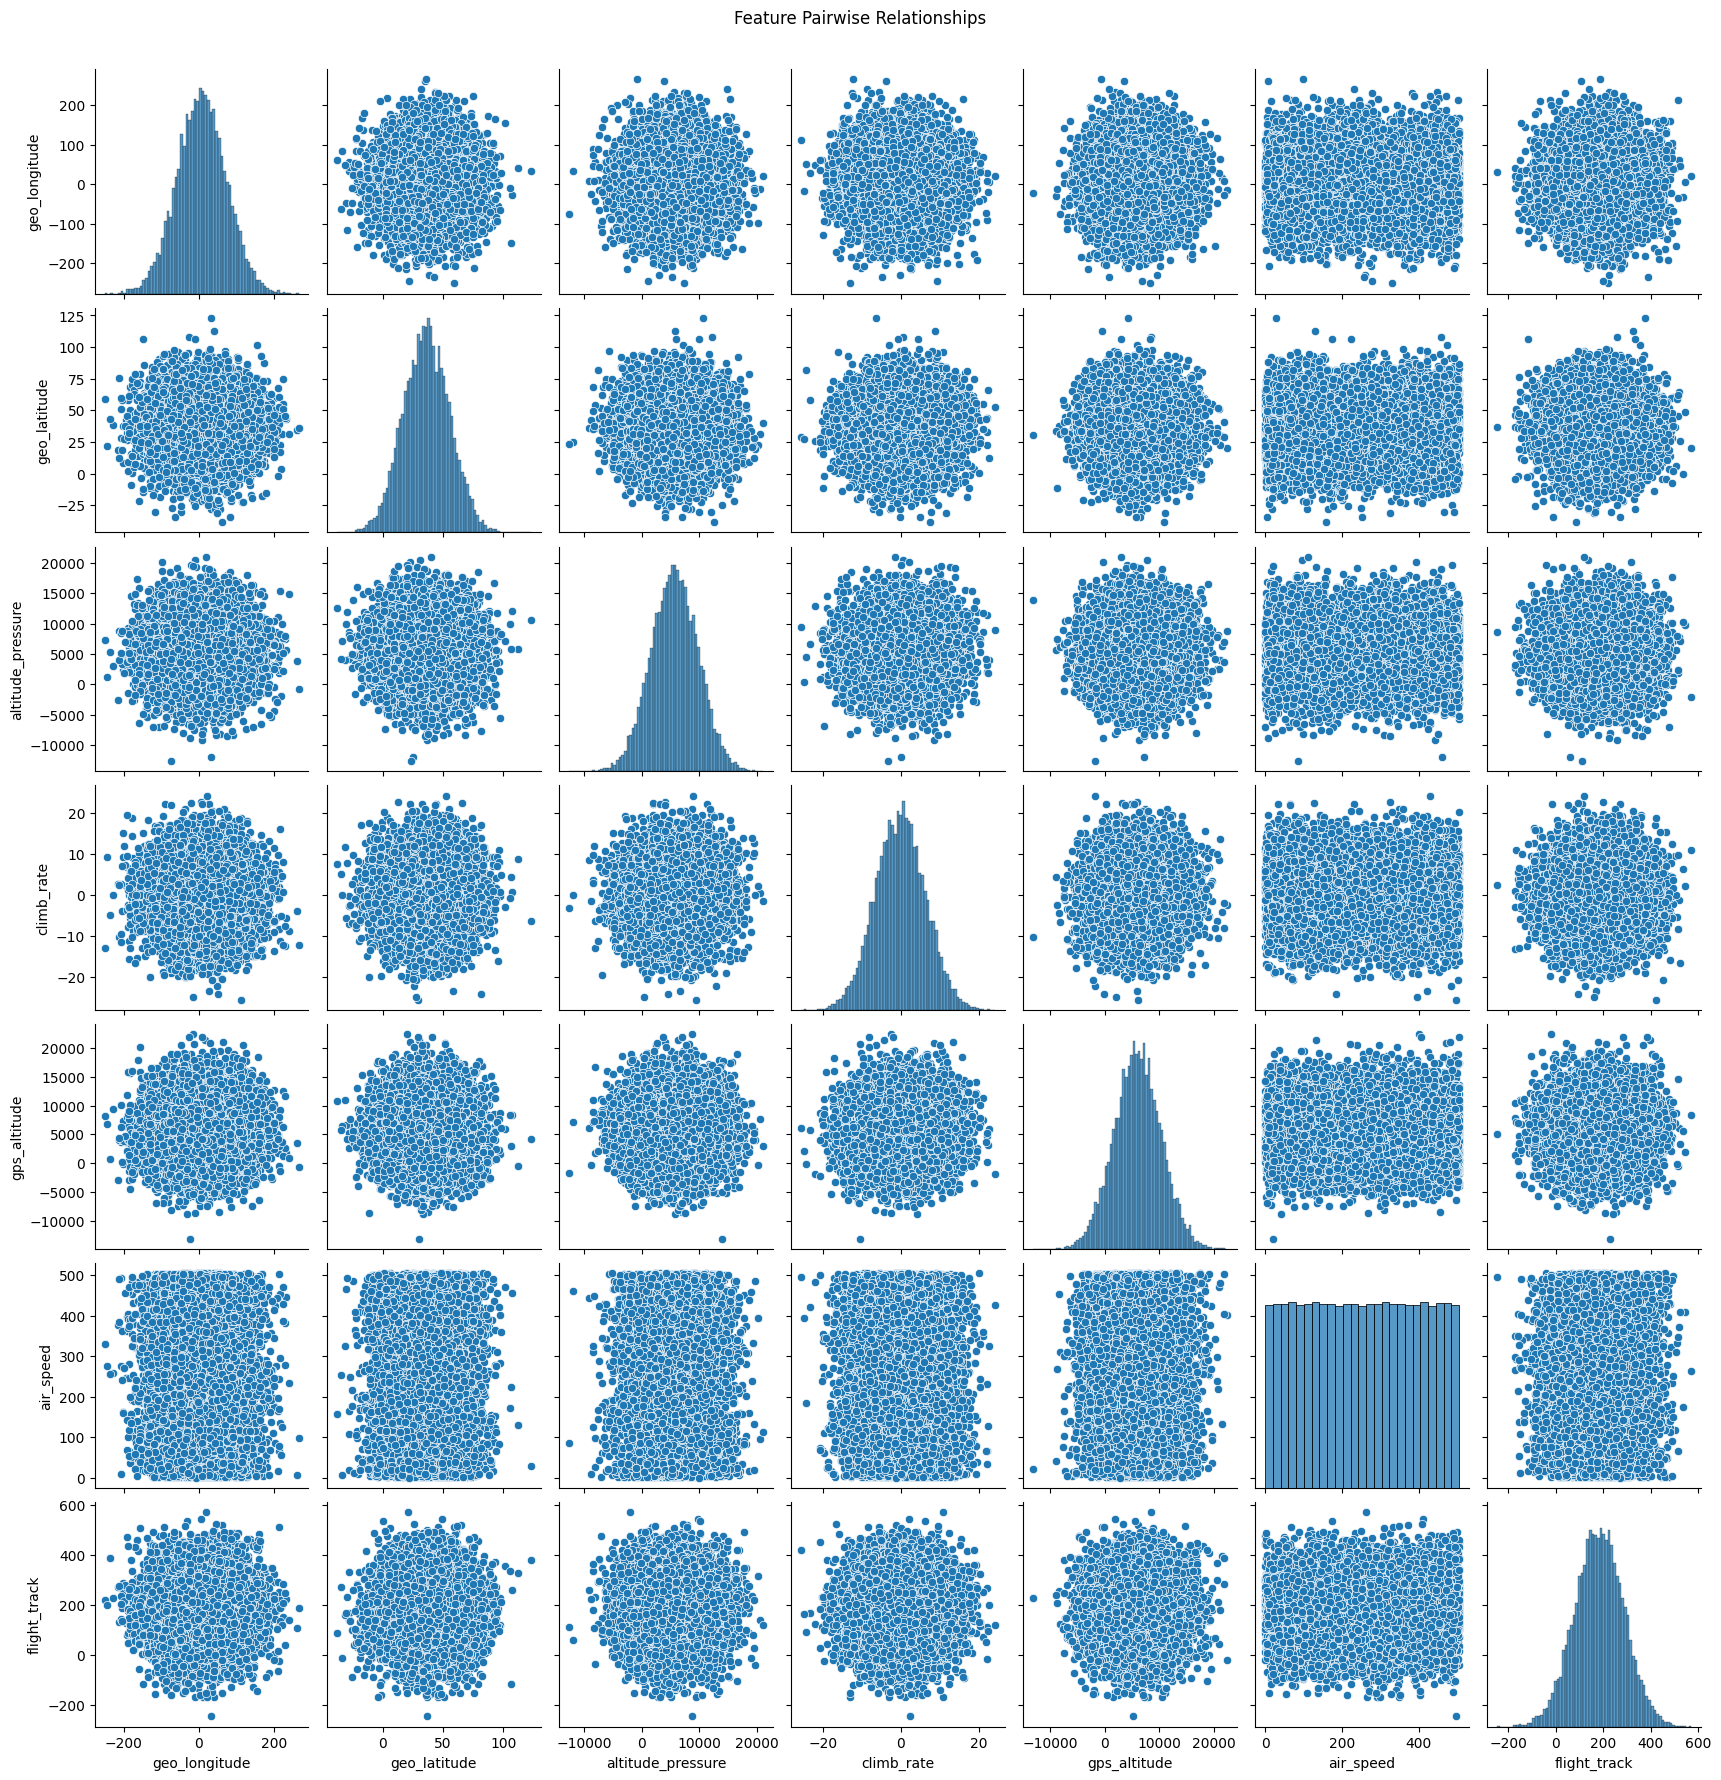

In [7]:
sns.pairplot(train_df)
plt.suptitle("Feature Pairwise Relationships", y=1.02)
plt.show()

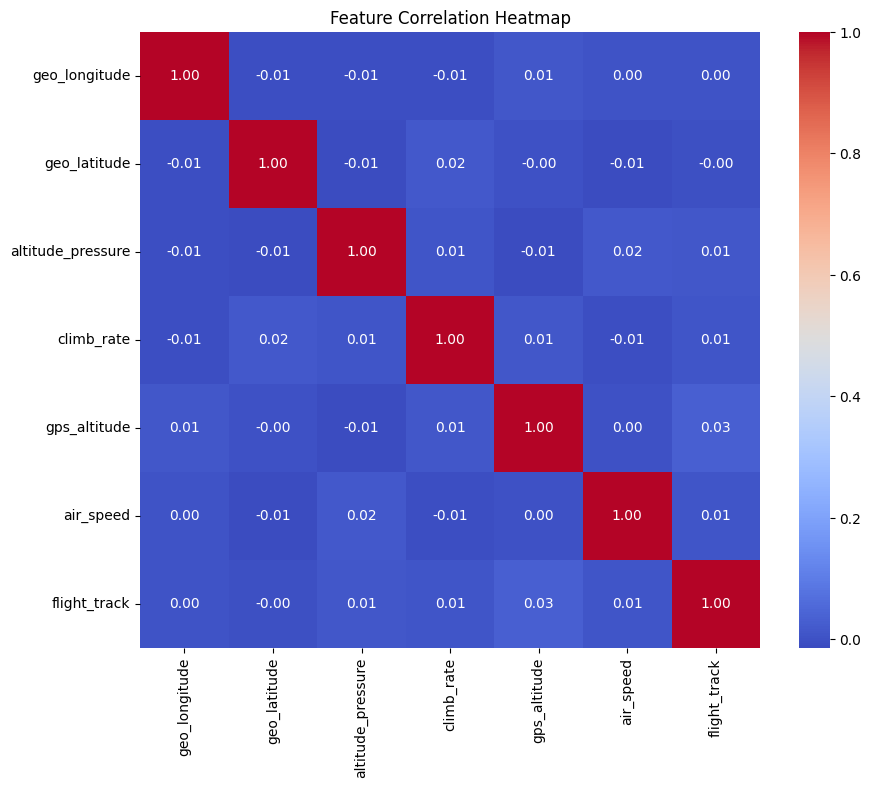

In [8]:
corr = train_df.corr()
plt.figure(figsize=(10,8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()

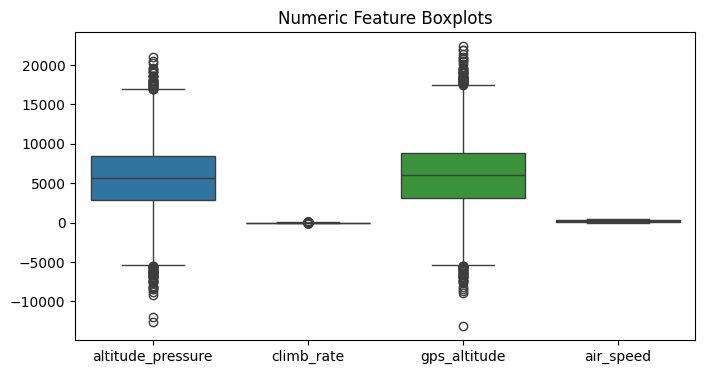

In [10]:
plt.figure(figsize=(8,4))
sns.boxplot(data=train_df[['altitude_pressure', 'climb_rate', 'gps_altitude', 'air_speed']])
plt.title("Numeric Feature Boxplots")
plt.show()

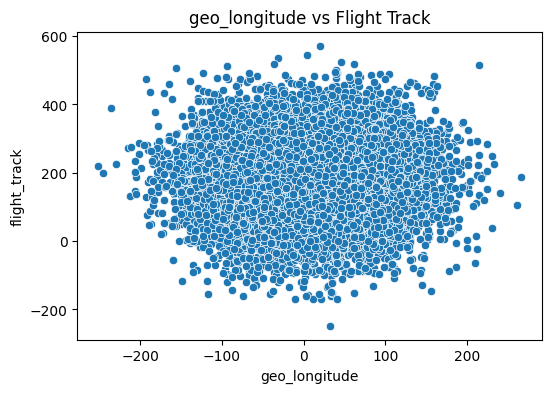

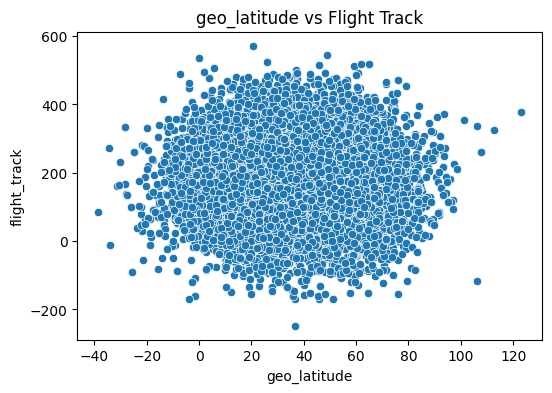

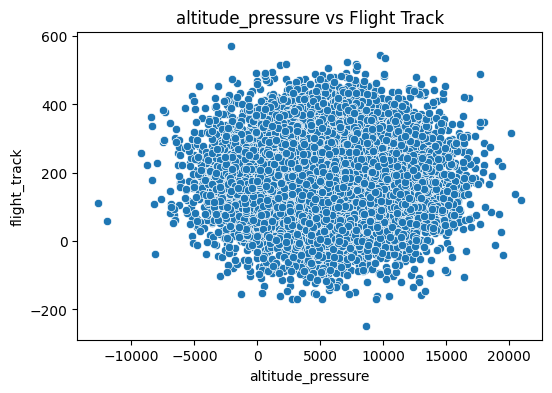

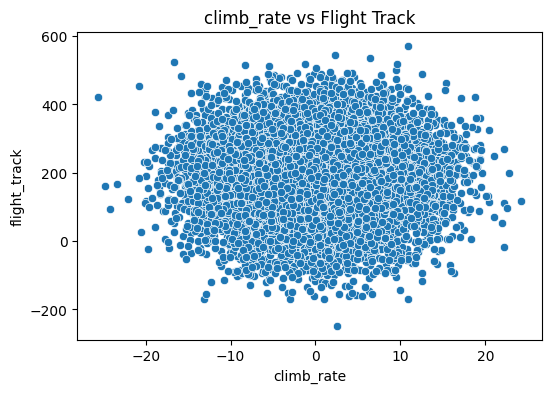

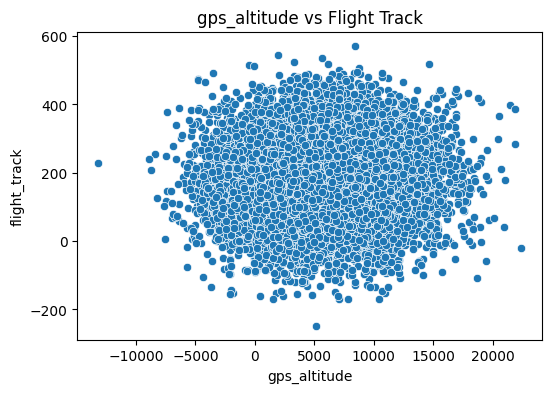

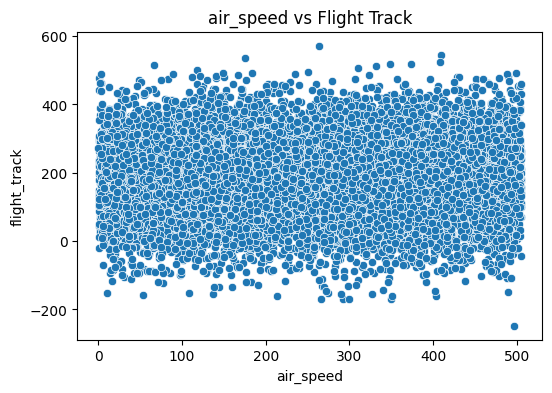

In [12]:
for col in train_df.columns[:-1]:
    plt.figure(figsize=(6,4))
    sns.scatterplot(x=train_df[col], y=train_df['flight_track'])
    plt.title(f"{col} vs Flight Track")
    plt.show()

In [14]:
X = train_df.drop('flight_track', axis=1)
y = train_df['flight_track']
X_full = full_df.drop('flight_track', axis=1, errors='ignore')
y_full = full_df['flight_track'] if 'flight_track' in full_df else y

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

In [16]:
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_val)
print("Validation MSE:", mean_squared_error(y_val, y_pred))
print("Validation R2:", r2_score(y_val, y_pred))


Validation MSE: 11353.158635395286
Validation R2: -0.03422712503619363


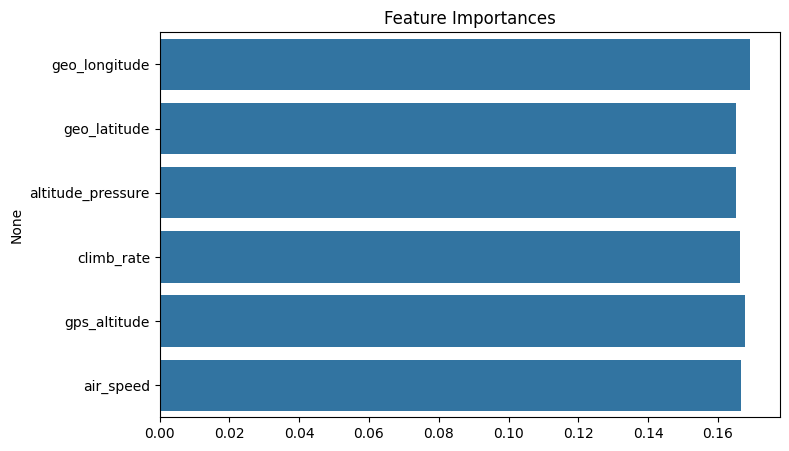

In [17]:
importances = model.feature_importances_
feat_names = X.columns
plt.figure(figsize=(8,5))
sns.barplot(x=importances, y=feat_names)
plt.title("Feature Importances")
plt.show()

In [ ]:
train_full = full_df[~full_df['flight_track'].isna()]

X_full_train = train_full.drop('flight_track', axis=1)
y_full_train = train_full['flight_track']
model_full = RandomForestRegressor(n_estimators=100, random_state=42)
model_full.fit(X_full_train, y_full_train)

RandomForestRegressor(random_state=42)

In [21]:
X_test = test_df.copy()
if 'flight_track' in X_test.columns:
    X_test = X_test.drop('flight_track', axis=1)

test_pred = model_full.predict(X_test)

submission = pd.DataFrame({'flighttrack': test_pred})
submission.to_csv('Submission.csv', index=False)

In [22]:
submission = pd.DataFrame({'flighttrack': test_pred})
submission.to_csv('Submission.csv', index=False)

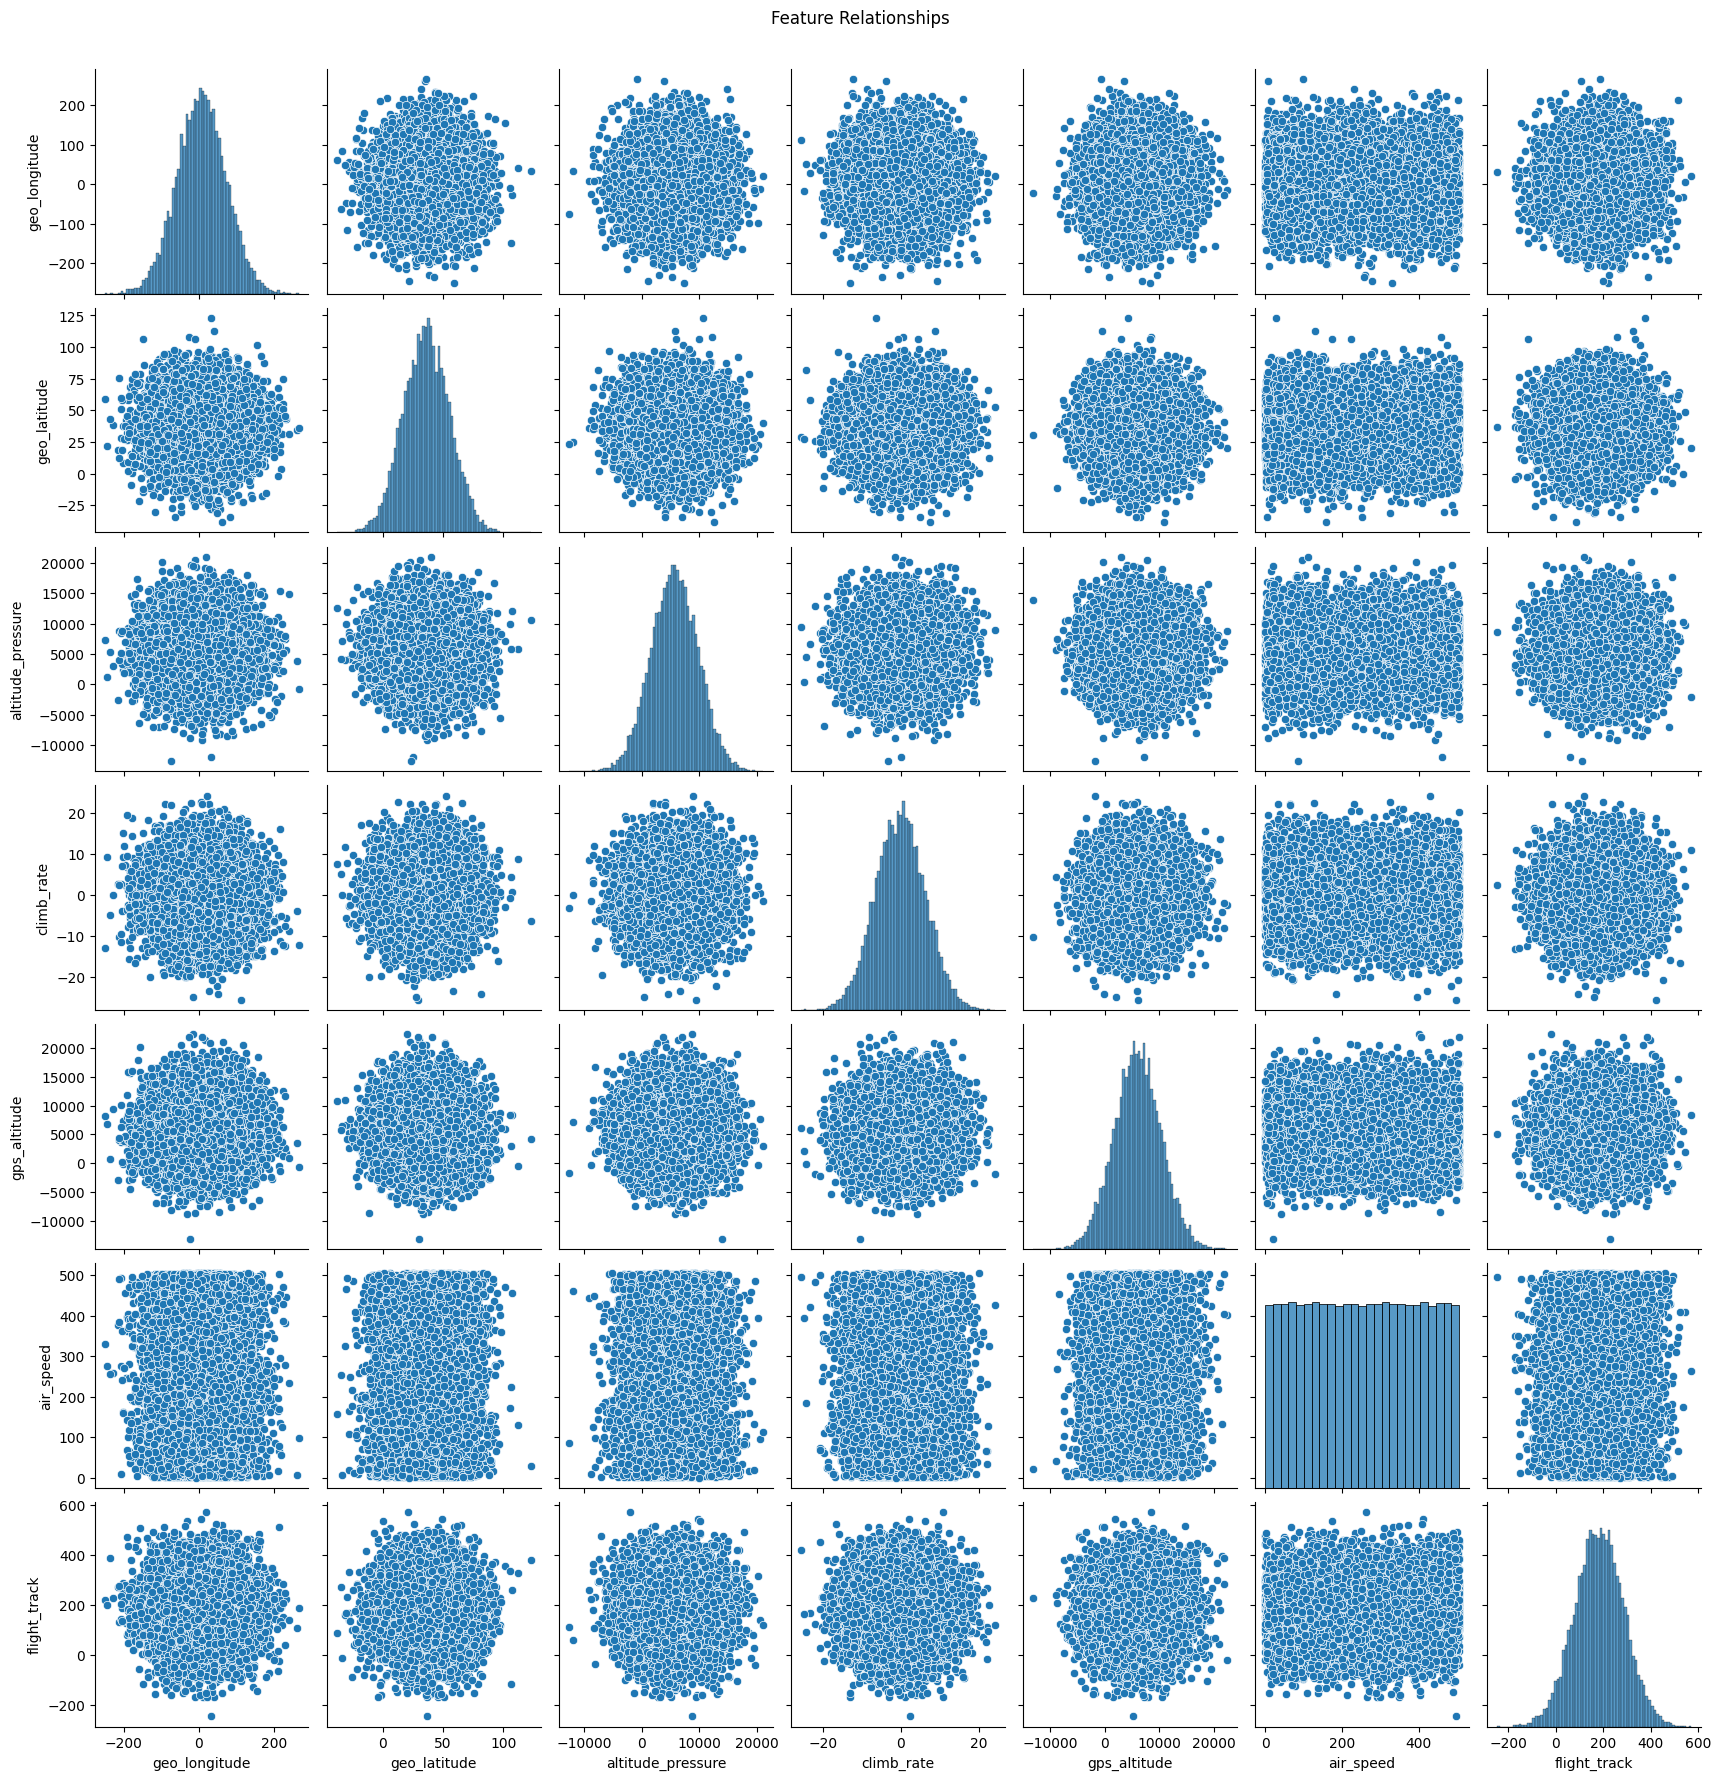

In [23]:
sns.pairplot(train_df)
plt.suptitle("Feature Relationships", y=1.02)
plt.show()

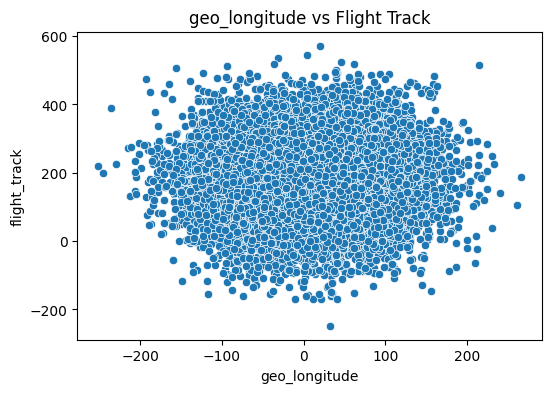

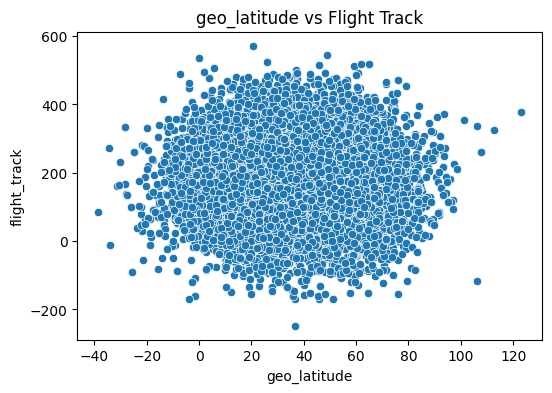

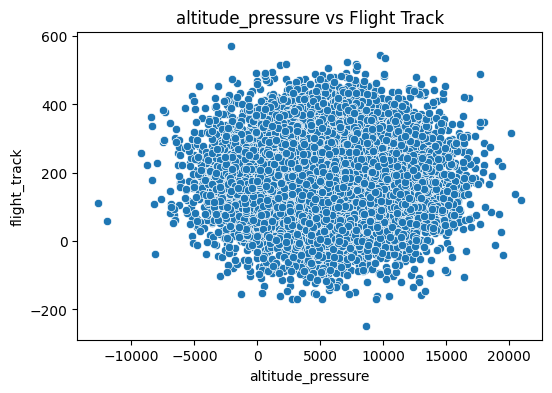

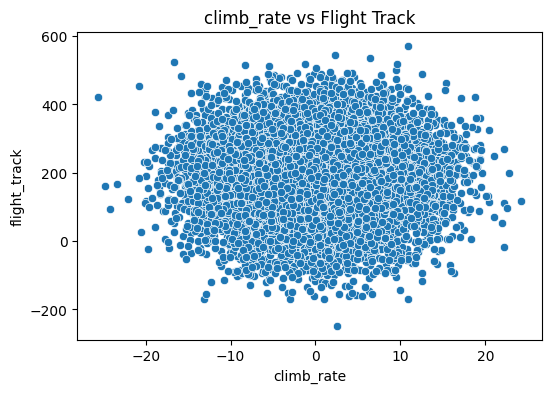

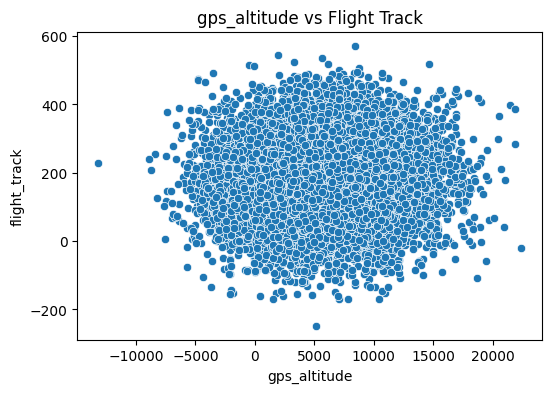

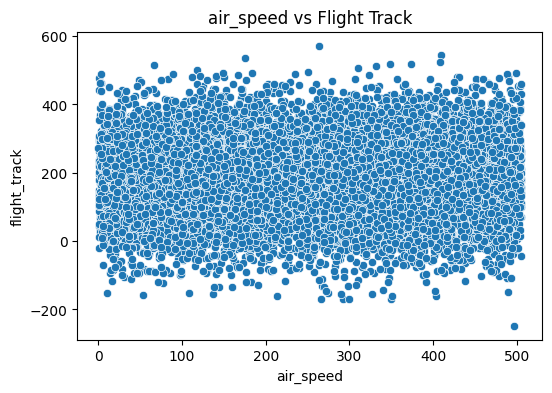

In [24]:
for col in X.columns:
    plt.figure(figsize=(6,4))
    sns.scatterplot(x=train_df[col], y=y)
    plt.title(f"{col} vs Flight Track")
    plt.show()

In [25]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import Ridge, Lasso
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
import plotly.express as px

In [26]:
param_grid = {'n_estimators': [100, 200], 'max_depth': [5, 10]}
rf_gs = GridSearchCV(RandomForestRegressor(), param_grid, cv=3, scoring='neg_mean_squared_error')
rf_gs.fit(X_train, y_train)
print(f"Best RF Params: {rf_gs.best_params_}")

Best RF Params: {'max_depth': 5, 'n_estimators': 100}


In [28]:
gb_model = GradientBoostingRegressor(n_estimators=200, max_depth=5)
gb_model.fit(X_train, y_train)
gb_pred = gb_model.predict(X_val)
mse = mean_squared_error(y_val, gb_pred)
rmse = np.sqrt(mse)

print("GBR Validation RMSE:", rmse)
print("GBR Validation R2:", r2_score(y_val, gb_pred))

GBR Validation RMSE: 105.92648331466548
GBR Validation R2: -0.022135156730202166


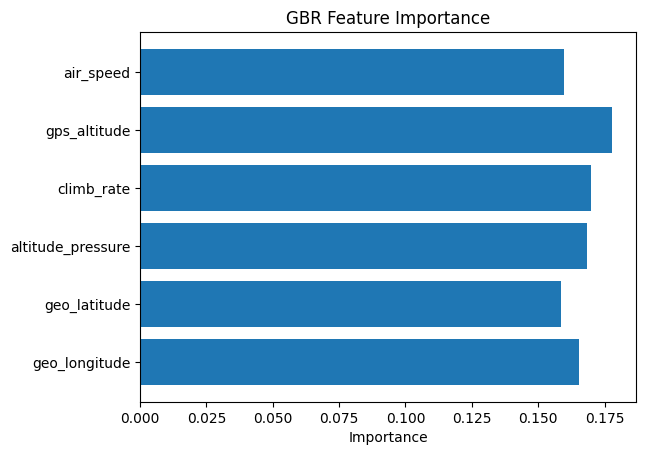

In [29]:
feat_importance = gb_model.feature_importances_
plt.barh(X.columns, feat_importance)
plt.xlabel("Importance")
plt.title("GBR Feature Importance")
plt.show()


In [30]:
final_pred = gb_model.predict(X_test)
submission = pd.DataFrame({'flighttrack': final_pred})
submission.to_csv('Submission.csv', index=False)

In [32]:
ridge = Ridge(alpha=1.0)
ridge.fit(X_train, y_train)
ridge_pred = ridge.predict(X_val)
mse_value = mean_squared_error(y_val, ridge_pred)
rmse = np.sqrt(mse_value)
print("Ridge RMSE:", rmse)

Ridge RMSE: 104.88937639918485


In [34]:
lasso = Lasso(alpha=0.1)
lasso.fit(X_train, y_train)
lasso_pred = lasso.predict(X_val)
mse_value = mean_squared_error(y_val, lasso_pred) 
rmse = np.sqrt(mse_value)
print("Lasso RMSE:", rmse)

Lasso RMSE: 104.88909353089622


In [35]:
for col in X.columns:
    fig = px.scatter(train_df, x=col, y='flight_track', title=f'{col} vs flight_track', opacity=0.4)
    fig.show()

fig = px.imshow(X.corr(), text_auto=True, aspect='auto', title='Correlation Matrix')
fig.show()